# Artifact Removal

Various types of artifacts were found on breast mammogram images, as shown below.

NameError: name 'j' is not defined

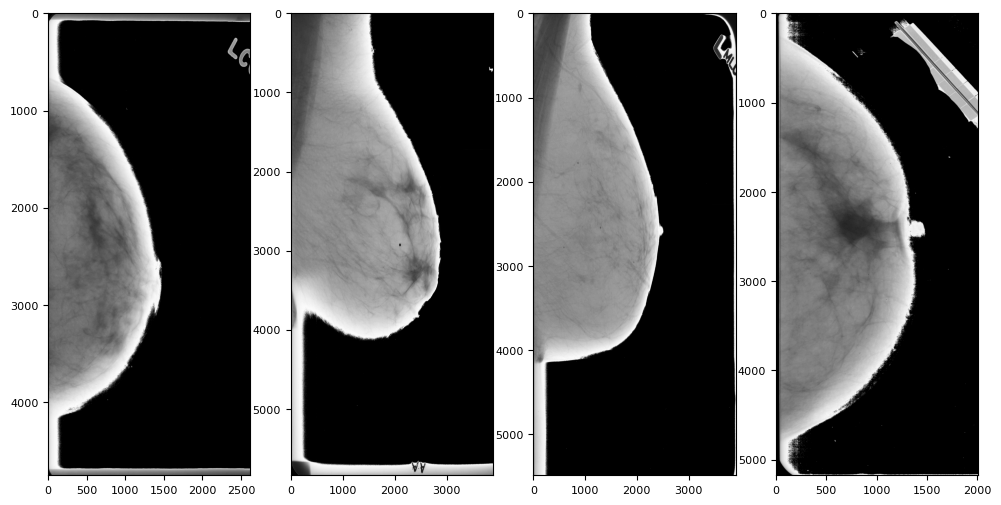

In [1]:
import os
if 'jbook' in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../../../..")))

import numpy as np
import cv2
import matplotlib.pyplot as plt
from bcd.utils.image import convert_uint8
from myst_nb import glue

img1 = "data/image/2_exp/train/benign/2a44122c-f831-4220-95a8-408bcafcf2ce.png"
img2 = "data/image/2_exp/train/benign/3f72309d-7cd9-4e30-ae81-073adb541bcd.png"
img3 = "data/image/2_exp/train/benign/97556037-b959-4395-830b-380dcac2d58e.png"
img4 = "data/image/2_exp/train/malignant/6cdf46d8-596b-47ab-a428-c8769733c93c.png"

img1 = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2, cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(img3, cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread(img4, cv2.IMREAD_GRAYSCALE)

img1 = convert_uint8(img1)
img2 = convert_uint8(img2)
img3 = convert_uint8(img3)
img4 = convert_uint8(img4)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,6))
_ = axes[0].imshow(img1, cmap='gray', aspect='auto')
_ = axes[1].imshow(img2, cmap='gray',aspect='auto')
_ = axes[2].imshow(img3, cmap='gray',aspect='auto')
_ = axes[3].imshow(img4, cmap='gray',aspect='auto')

labels = np.array(["(a)", "(b)", "(c)", "(d)"])
for i in range(4):
    _ = axes[i].set_xlabel(labels[i,j])
    _ = axes[i].set_xticks([])
    _ = axes[i].set_yticks([])


plt.tight_layout()

glue("artifacts", fig)

```{glue:figure} artifacts
---
align: center
name: artifacts_fig
---
Artifacts in Mammogram Images
```

Edges, text, annotations, and other objects tend to have pixel intensities similar to those of the ROI. It is, therefore, crucial that such artifacts are removed before the modeling stage. One of the simplest ways to segment artifacts from an image is by binary threshold masking.